In [121]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import make_circles

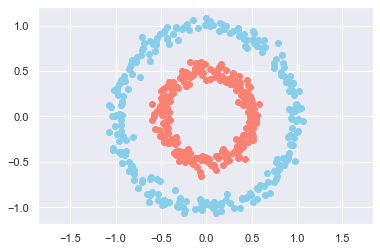

In [122]:
n = 500 # rows
p = 2   # columns

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

sns.set_style('darkgrid')
sns.set_context('notebook')

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')

plt.axis('equal')
plt.show()

In [123]:
class NeuralLayer():
    
    def __init__(self, n_conn, n_neur, act_fun):
        
        self.act_fun = act_fun
        self.b = np.random.rand(1, n_neur)*2 - 1
        self.W = np.random.rand(n_conn, n_neur)*2 - 1

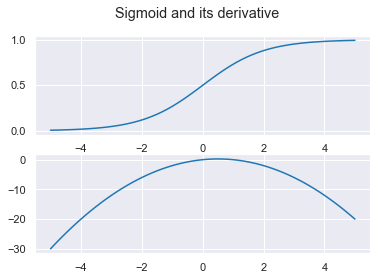

In [124]:
sigmd = (lambda x: 1 / (1 + np. e ** (-x)), lambda x: x * (1-x))

_x = np.linspace(-5, 5, 100)

plt.figure()
plt.suptitle('Sigmoid and its derivative')

plt.subplot(211)
plt.plot(_x, sigmd[0](_x))

plt.subplot(212)
plt.plot(_x, sigmd[1](_x))

Text(0.5, 1.0, 'Relu activation function')

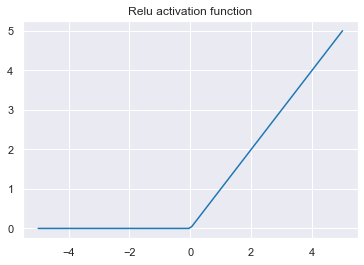

In [125]:
relu = lambda x: np.maximum(0, x)

plt.plot(_x, relu(_x))
plt.title('Relu activation function')

In [126]:
l0 = NeuralLayer(p, 4, sigmd)
l1 = NeuralLayer(p, 8, sigmd)


def create_nn(topology, act_fun):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(NeuralLayer(topology[l], topology[l+1], act_fun))
        
    return nn

In [127]:
topology = [p, 4, 8, 16, 8, 4, 1]

neural_net = create_nn(topology, sigmd)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), lambda Yp, Yr: (Yp - Yr))

In [128]:
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    out = [(None, X)]
    
    for l, layer in enumerate(neural_net):  
        
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_fun[0](z)
        
        out.append((z, a))
        
    print(l2_cost[0](out[-1][1], Y))
    
    if train:
        
        delts = []
        
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) - 1:
                delts.insert(0, l2_cost[1](a, Y) * neural_net[l].act_fun[1](a))                
            else:
                delts.insert(0, delts[0] @ _W.T * neural_net[l].act_fun[1](a))
                
            _W = neural_net[l].W
                                
            neural_net[l].b = neural_net[l].b - np.mean(delts[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ delts[0] * lr
            
    return out[-1][1]
                                
train(neural_net, X, Y, l2_cost, 0.5)

0.34875219621652725


array([[0.18564325],
       [0.18573817],
       [0.1856324 ],
       [0.18575082],
       [0.18574499],
       [0.18574946],
       [0.18578483],
       [0.18573051],
       [0.18568086],
       [0.18570669],
       [0.18582117],
       [0.18579571],
       [0.18573216],
       [0.18569565],
       [0.1857845 ],
       [0.18574306],
       [0.18584378],
       [0.18572841],
       [0.18577419],
       [0.18564027],
       [0.18573953],
       [0.18574926],
       [0.18583667],
       [0.18569879],
       [0.18579628],
       [0.18573807],
       [0.18580717],
       [0.18586108],
       [0.18569438],
       [0.18569575],
       [0.18579852],
       [0.18576609],
       [0.18576141],
       [0.18579937],
       [0.18581724],
       [0.18575103],
       [0.18572937],
       [0.18581331],
       [0.18563819],
       [0.18585739],
       [0.18571516],
       [0.18585153],
       [0.18576344],
       [0.18564864],
       [0.18585379],
       [0.18581156],
       [0.18565895],
       [0.185